# Import

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.append('./src/fast_ica/')
from fast_ica import Fast_ICA

# Hyperparameters

In [2]:
NB_SAMPLES    = 100_000
NB_COMPONENTS = 2
NB_FEATURES   = 2

# Smooth signals

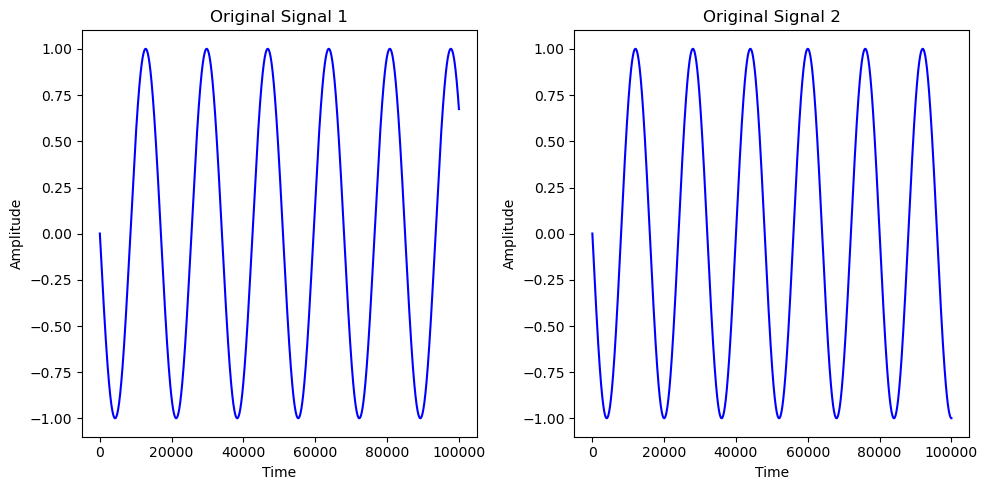

In [3]:
S = np.zeros((NB_FEATURES, NB_SAMPLES))
for k in range(NB_FEATURES):
    S[k] = np.cos(2*np.pi*np.linspace(0, 100, NB_SAMPLES)/np.random.randint(low=10, high=20) + np.random.binomial(p=0.5, n=1) * np.pi / 2) + 1e-3

plt.subplots(1, NB_FEATURES, figsize=(10, 5))

for k in range(NB_FEATURES):
    plt.subplot(1, NB_FEATURES, k+1)
    plt.plot(S[k], color='blue')
    plt.title('Original Signal {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Mixed Signals

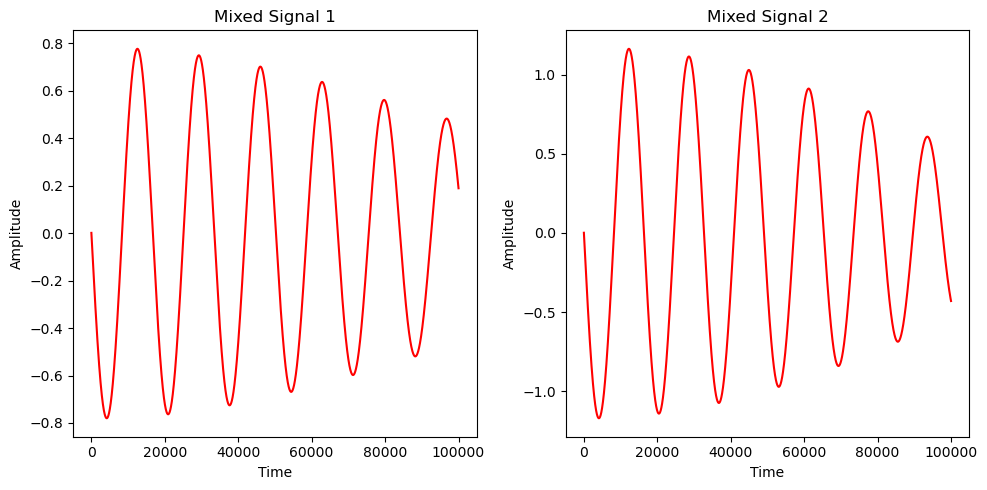

In [4]:
A = np.random.random(size=(NB_COMPONENTS, NB_FEATURES))
X = A @ S

plt.subplots(1, NB_COMPONENTS, figsize=(10, 5))

for k in range(NB_COMPONENTS):
    plt.subplot(1, NB_COMPONENTS, k+1)
    plt.plot(X[k], color='red')
    plt.title('Mixed Signal {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Implement ICA algorithm

In [5]:
%%timeit
ica = Fast_ICA(n_components=NB_FEATURES, func='exp')
S_ = ica.fit_transform(X, method='iterative')
S_

14.9 ms ± 292 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
ica = Fast_ICA(n_components=NB_FEATURES, func='exp')
S_ = ica.fit_transform(X, method='parallel')
S_

17.2 ms ± 774 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
ica = Fast_ICA(n_components=NB_FEATURES)
S_ = ica.fit_transform(X, method='parallel')
S_

array([[ 0.03577221,  0.03528272,  0.03479323, ..., -1.59516395,
        -1.59509931, -1.59503443],
       [ 0.00457925,  0.0041286 ,  0.00367796, ...,  1.21122793,
         1.21083013,  1.21043216]])

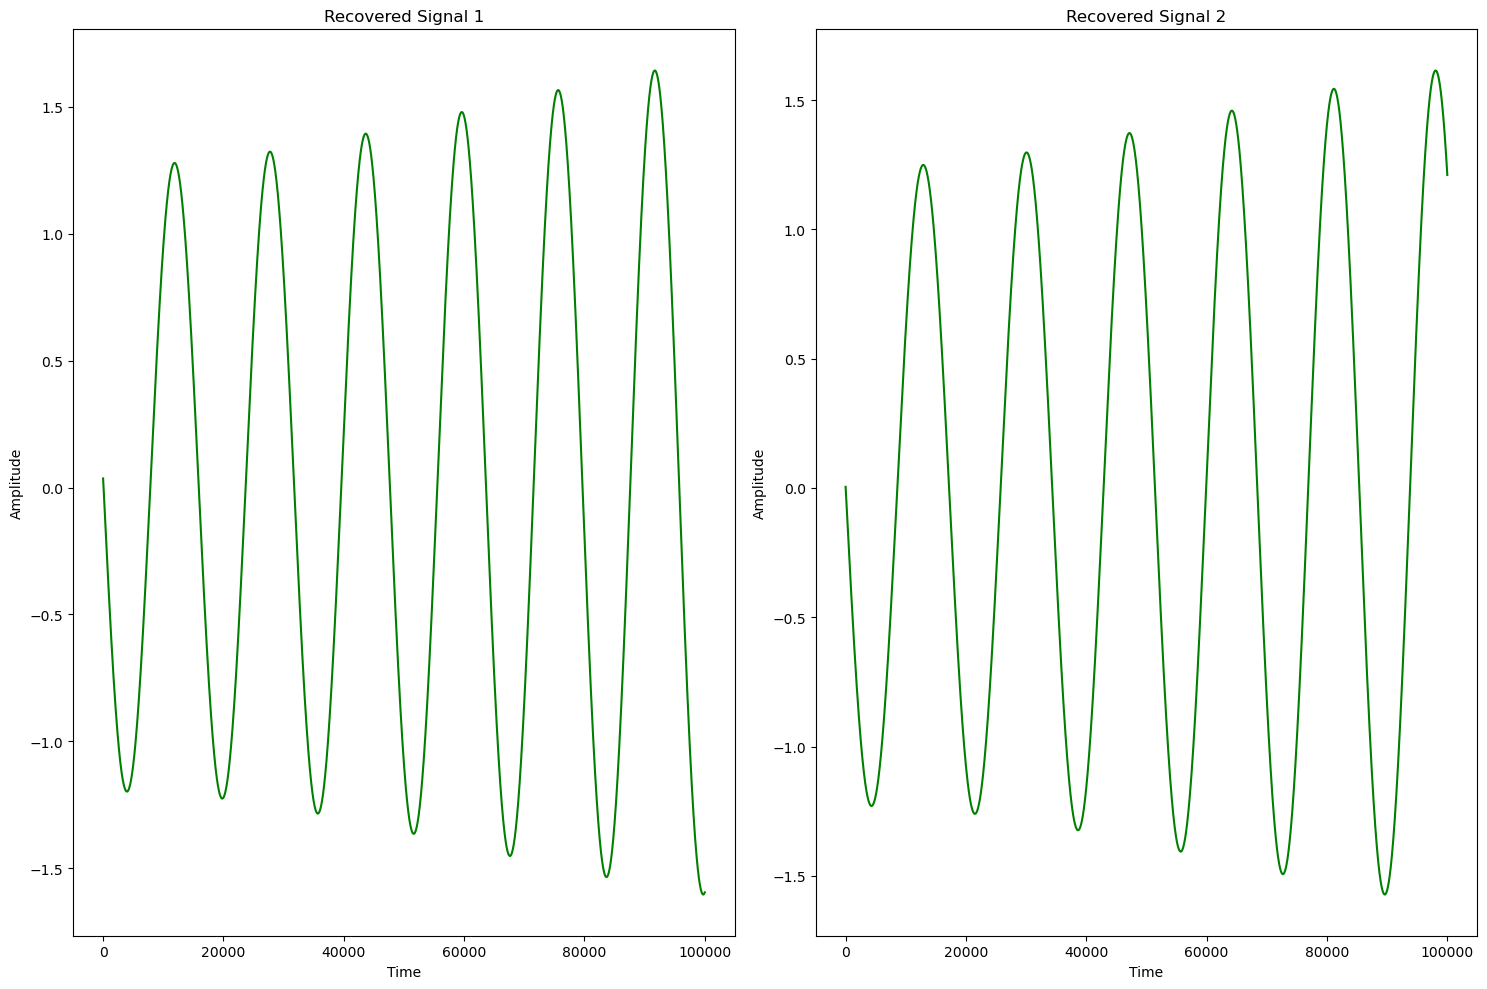

In [8]:
plt.subplots(1, NB_COMPONENTS, figsize=(15, 10))

for k in range(NB_FEATURES):
    plt.subplot(1, NB_FEATURES, k+1)
    plt.plot(S_[k], color='green')
    plt.title('Recovered Signal {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [9]:
# from dtw import dtw
# matrix_dtw = np.zeros((NB_COMPONENTS, NB_COMPONENTS))

# for i in range(NB_COMPONENTS):
#     for j in range(NB_COMPONENTS):
#         matrix_dtw[i, j] = dtw(S[i], S_[j]).distance

# matrix_dtw

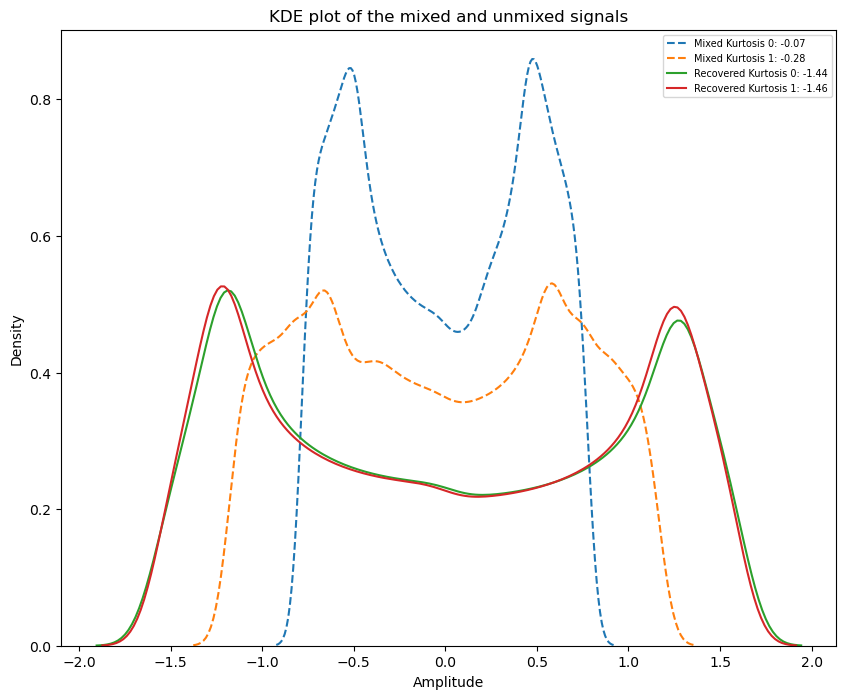

In [11]:
import seaborn as sns

def kurtosis(X):
    return np.mean(X**4, axis=1) - 3 * np.mean(X**2, axis=1)**2

plt.figure(figsize=(10, 8))
plt.title('KDE plot of the mixed and unmixed signals')

for i in range(NB_COMPONENTS):
    sns.kdeplot(X[i], ls='--', label=f"Mixed Kurtosis {i}: {kurtosis(X)[i]:.2f}")

for i in range(NB_FEATURES):
    sns.kdeplot(S_[i], label=f"Recovered Kurtosis {i}: {kurtosis(S_)[i]:.2f}")

plt.tick_params(labelsize=10)
plt.legend(loc='best', fontsize=7)
plt.xlabel('Amplitude', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()